# Economic growth analysis

## Submitted by: Group 7

### Contributors: *Fen Francis Pereira, Jayaram K, Ashmina T, Ashik James T.*

**Objective:** To read the data set into python and answer the following questions: 
1. Find out how many countries are there in the dataset. 
2. Examine the data by using visualizations. 
3. Find out how many countries with respect to the region are available in the dataset. 
4. On average which region has the highest  
&emsp;a. GDP per capita (current US\\$)  
&emsp;b. International trade: Imports (million US\\$) 
5. Find out which region has more consistent with respect to GDP per capita (current US$)

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
data = pd.read_excel('Dataset_w6.xlsx')

In [3]:
data.head()

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864,35530,623.2,125,3568
1,Albania,SouthernEurope,28748,2930,3984.2,134,4669
2,Algeria,NorthernAfrica,2381741,41318,4154.1,160,47091
3,Angola,MiddleAfrica,1246700,29784,4714.1,175,8790
4,Antigua and Barbuda,Caribbean,442,102,14764.5,88,491


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country                                     196 non-null    object 
 1   Region                                      196 non-null    object 
 2   Surface area (km2)                          196 non-null    int64  
 3   Population in thousands (2017)              196 non-null    int64  
 4   GDP per capita (current US$)                196 non-null    float64
 5   Agricultural production index               196 non-null    int64  
 6   International trade: Imports (million US$)  196 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 10.8+ KB


## 1. Find out how many countries are there in the dataset.

In [5]:
#to get the count of unique items nunique() is used.
country_count = data.country.nunique()
print("There are",country_count,"countries in the given dataset.")

There are 196 countries in the given dataset.


In [6]:
#we know each record in the given dataset corresponds to a country
#so, by simply finding the length of the country column also gives the number of countries in the dataset
len(data.country)

196

## 2. Examine the data by using visualizations. 

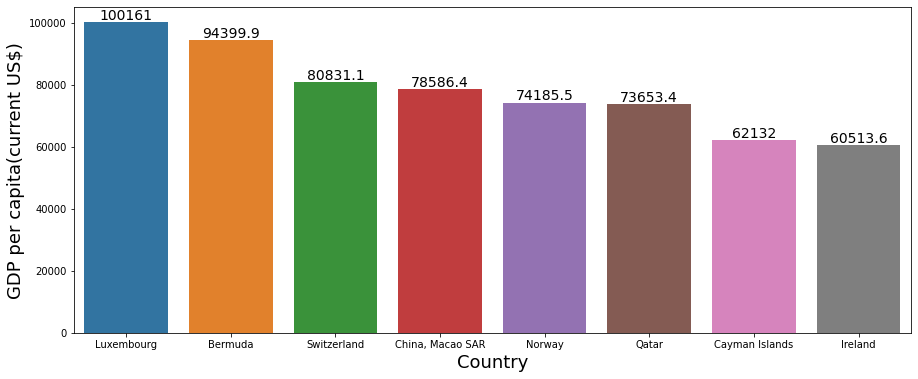

In [7]:
#bar plot 
#top 8 countries based on GDP per capita
plt.figure(figsize = (15,6))
top_countries = data.nlargest(8,'GDP per capita (current US$)')
top_gdp_plot = sns.barplot(x='country', y='GDP per capita (current US$)', data=top_countries)
plt.ylabel("GDP per capita(current US$)",fontsize=18)
plt.xlabel("Country",fontsize=18)
plt.bar_label(top_gdp_plot.containers[0],fontsize=14)
plt.show()

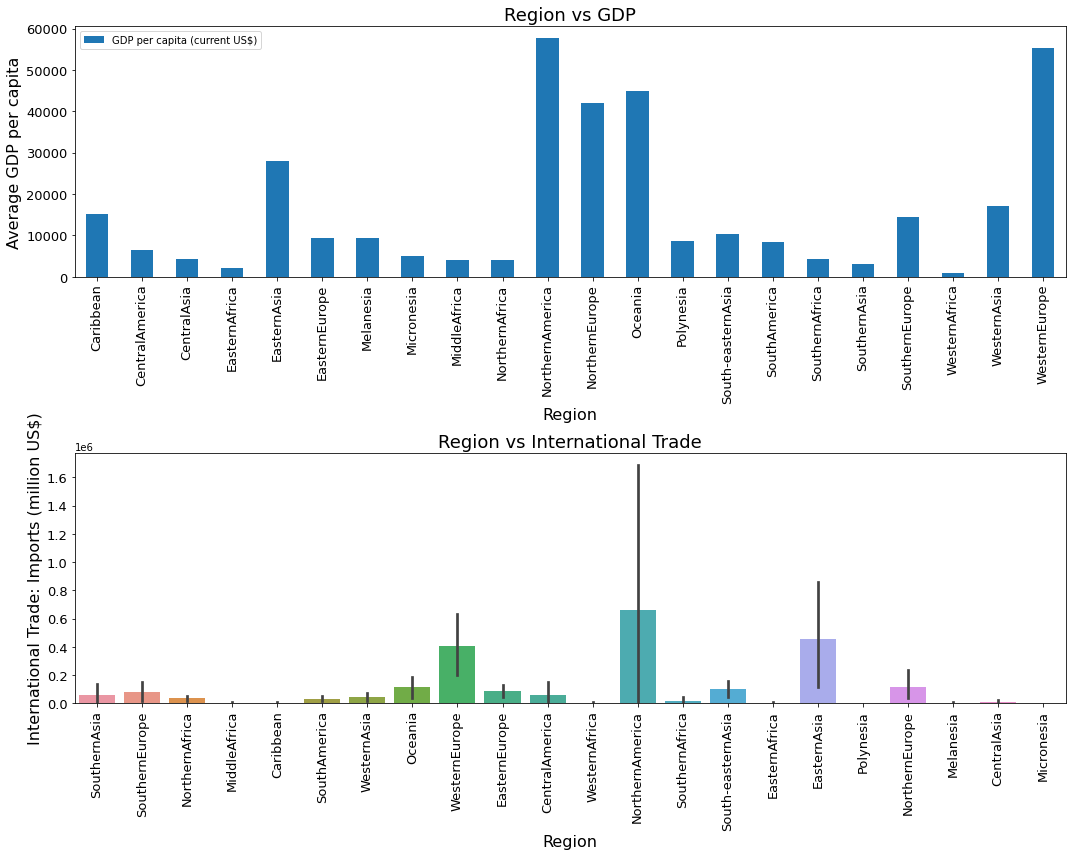

In [8]:
#bar graph of Region Vs GDP per capita

plt.figure(figsize = (15,12))   
ax=plt.subplot(2,1,1)   
data.groupby('Region')[['Region','GDP per capita (current US$)']].mean().plot(kind='bar',ax=ax) 
plt.title('Region vs GDP', fontsize = 18)
plt.ylabel('Average GDP per capita',fontsize=16)
plt.xlabel('Region',fontsize=16)
plt.xticks(fontsize=13,rotation = 90)
plt.yticks(fontsize=13)

#barplot of Region Vs International trade imports
plt.subplot(2,1,2)
sns.barplot(x='Region',y='International trade: Imports (million US$)', data=data) 
plt.title('Region vs International Trade', fontsize = 18)
plt.xlabel('Region',fontsize=16)
plt.ylabel('International Trade: Imports (million US$)',fontsize=16)
plt.xticks(fontsize=13,rotation = 90)
plt.yticks(fontsize=13)


plt.tight_layout()
plt.show()

We can find from the graph that NorthernAmerica and WesternEurope are top both GDP and International Trade.

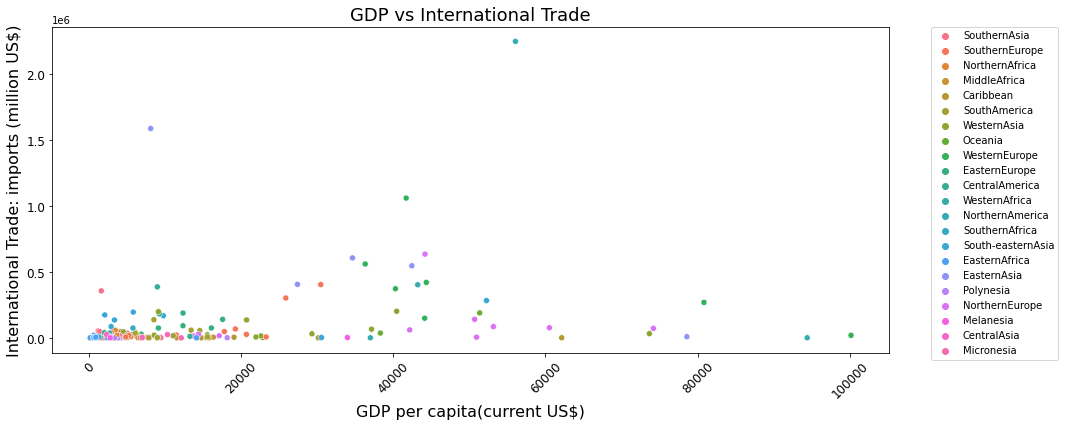

In [9]:
plt.figure(figsize = (15,6))  
sns.scatterplot(x='GDP per capita (current US$)',y='International trade: Imports (million US$)',hue = 'Region', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('GDP vs International Trade', fontsize = 18)
plt.xlabel('GDP per capita(current US$)',fontsize=16)
plt.ylabel('International Trade: imports (million US$)',fontsize=16)
plt.xticks(fontsize=12,rotation = 45)
plt.yticks(fontsize=12)
plt.show()

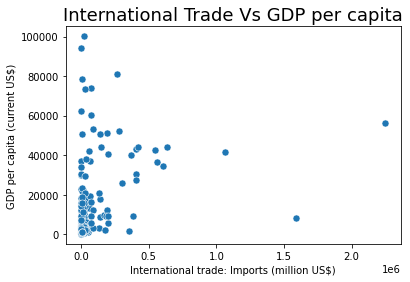

In [10]:
#scatterplot of International trade imports Vs GDP per capita
sns.scatterplot(x='International trade: Imports (million US$)',y="GDP per capita (current US$)", data = data, s=50)
plt.title('International Trade Vs GDP per capita', fontsize = 18)
plt.show()

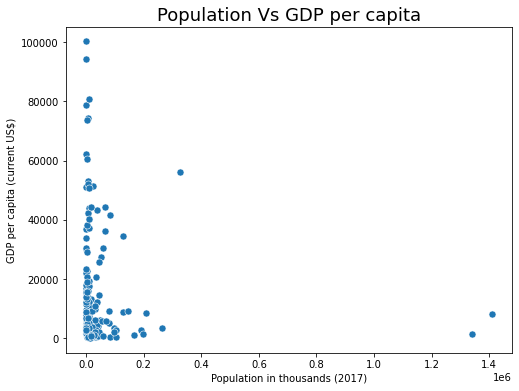

In [11]:
#scatterplot between population and GDP
plt.figure(figsize = (8,6))
sns.scatterplot(x='Population in thousands (2017)',y="GDP per capita (current US$)", data = data, s=50)
plt.title('Population Vs GDP per capita', fontsize = 18)
plt.show()

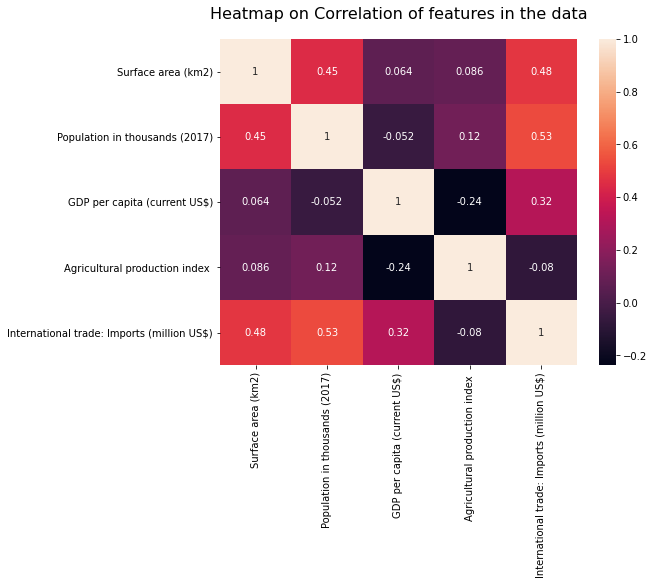

In [12]:
#heatmap to identify the correlation between numerical features in the dataset
plt.figure(figsize = (8,6) )
plt.title('Heatmap on Correlation of features in the data',fontsize=16,pad=20)
sns.heatmap(data.corr(),annot = True)
plt.xticks(rotation = 90)
plt.show()

Population is having a negative impact on GDP per capita(as population increases GDP per capita decreases to an extent in the absence of corresponding increase in the income).
population and surface area is positively related to International trade imports.

## 3. Find out how many countries with respect to the region are available in the dataset.

In [13]:
print('The list showing number of countries with respect to the region:')
data[['Region','country']].groupby('Region').count()

The list showing number of countries with respect to the region:


,country
Region,
Caribbean,16
CentralAmerica,8
CentralAsia,5
EasternAfrica,17
EasternAsia,7
EasternEurope,10
Melanesia,5
Micronesia,4
MiddleAfrica,9


We can also find the information about how many countries with respect to the region are available in the dataset using the graph.

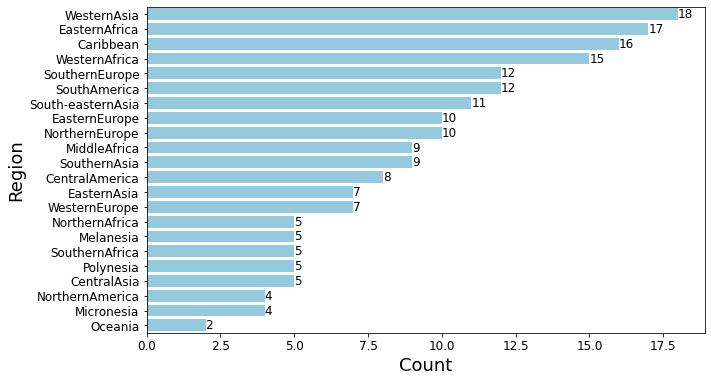

In [14]:
plt.figure(figsize = (10,6) )
country_count = sns.countplot(y ='Region',data = data, order = data.Region.value_counts().index, color ='skyblue')
plt.xlabel('Count',fontsize=18)
plt.ylabel('Region',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.bar_label(country_count.containers[0],fontsize=12)    
plt.show()

## 4.a. Region with highest average GDP per capita (current US\\$)

In [15]:
#grouping the dataset based on Region & calculating the average GDP per region
grouped_data1 = data.groupby('Region')['GDP per capita (current US$)'].mean()
#retrieving the region with highest average GDP
grouped_data1.nlargest(1)

Region
NorthernAmerica    57659.0
Name: GDP per capita (current US$), dtype: float64

Northern America has the highest GDP per Capita based on average.

## 4.b. Region with highest average International trade: Imports (million US\\$)

In [16]:
#grouping the dataset based on Region & calculating the average International trade imports 
grouped_data2 = data.groupby('Region')['International trade: Imports (million US$)'].mean()
#retrieving the region with highest average International trade imports
grouped_data2.nlargest(1)

Region
NorthernAmerica    663552.25
Name: International trade: Imports (million US$), dtype: float64

Northern America has the highest International Trade on average.

## 5. Find out which region has more consistent with respect to GDP per capita (current US\\$)

In [17]:
#grouping the dataset based on Region & calculating the standard deviation on GDP per capita
grouped_data3 = data.groupby('Region')['GDP per capita (current US$)'].std()
#as standard deviation(spreadness of data) decreases, the data will be more consistent 
#retrieving the region with smaller standard deviation
grouped_data3.nsmallest(1)

Region
WesternAfrica    815.095399
Name: GDP per capita (current US$), dtype: float64

Lower the Standard deviation means values are less spread(closer to average). So in this case Region with lowest Standard Deviation have the consistent GDP per capita.
Western Africa is the most consistent with respect to GDP per capita.